In [1]:
import pandas as pd
import numpy as np

In [2]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [3]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [4]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [5]:
# df = pd.concat([tmp, tmp_2])

In [6]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [7]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [8]:
# male_df = df[df['Gender'] == 'Male']

In [9]:
# female_df = df[df['Gender'] == 'Female']

In [10]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [12]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

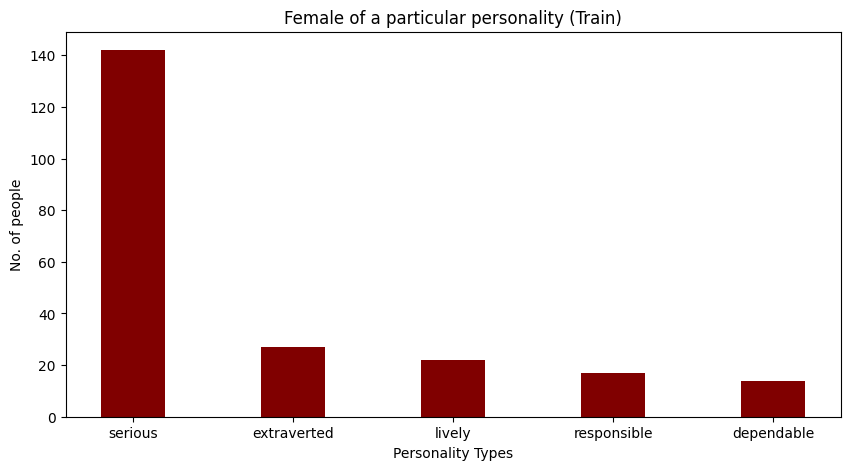

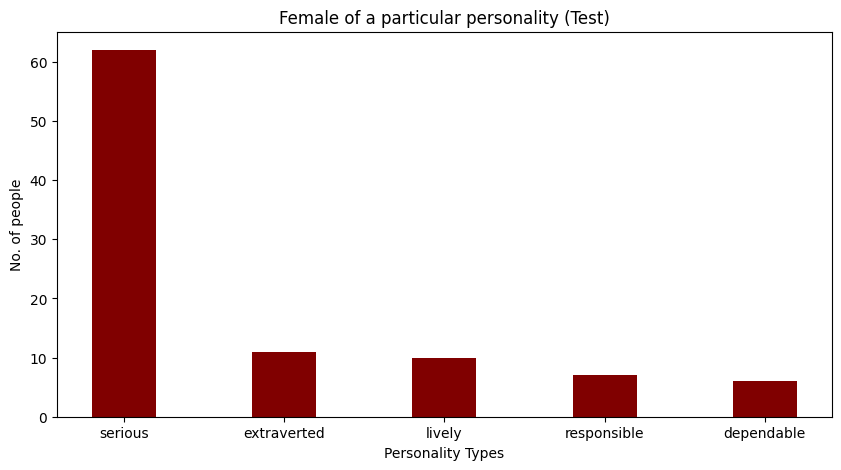

In [13]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality (Class label)'].value_counts()._get_axis(axis=0)),
                list(i['Personality (Class label)'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [14]:
X_train

,agreeableness,openness,extraversion,conscientiousness,Age,neuroticism
105,6,4,8,4,19,7
124,5,5,3,7,22,4
265,4,5,3,3,20,5
185,5,7,6,3,19,3
16,6,5,5,6,17,4
...,...,...,...,...,...,...
224,4,5,5,6,23,4
290,6,5,6,5,21,8
247,7,1,6,4,19,5
253,5,6,6,2,17,6


In [15]:
y_train

,Personality (Class label)
105,serious
124,lively
265,serious
185,serious
16,serious
...,...
224,serious
290,extraverted
247,serious
253,extraverted


In [16]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_test)

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,1.0
92,1.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,1.0
94,0.0,0.0,0.0,1.0,0.0


In [17]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [18]:
y_train

,Personality (Class label)
105,serious
124,lively
265,serious
185,serious
16,serious
...,...
224,serious
290,extraverted
247,serious
253,extraverted


In [19]:
# y_train = one_hot_encode(y_train)

In [20]:
# y_test = one_hot_encode(y_test)

In [21]:
# X = X_train + X_test
X = pd.concat([X_train, X_test])
# y = y_train + y_test
y = pd.concat([y_train, y_test])

X.isna().sum()

agreeableness        0
openness             0
extraversion         0
conscientiousness    0
Age                  0
neuroticism          0
dtype: int64

In [22]:
# y['Personality (Class label)']

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

In [24]:
# X_train

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, y_enc,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 81.25%
MAE scores:
 [0.125      0.0625     0.03125    0.22222222 0.12698413]
Average MAE score (across experiments):
0.11359126984126984


In [26]:
X_train, X_test, y_train, y_test = df_load_and_split('male')

In [27]:
from sklearn import svm
clf = svm.SVC(
 C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 65.625%
MAE scores:
 [0.828125   0.84375    0.890625   0.84126984 0.87301587]
Average MAE score (across experiments):
0.8553571428571429


In [28]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

clf = KNeighborsClassifier(leaf_size=5, p=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')




Accuracy: 68.75%


In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                    solver='adam', alpha=0.00001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=20000, shuffle=True, random_state=42, 
                    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 89.58333333333334%
MAE scores:
 [0.34375    0.28125    0.125      0.12698413 0.0952381 ]
Average MAE score (across experiments):
0.19444444444444445


In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, max_iter_predict=100, 
                                warm_start=False, copy_X_train=True, 
                                random_state=42, multi_class='one_vs_rest', 
                                n_jobs=None)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 89.58333333333334%
MAE scores:
 [0.03125    0.125      0.125      0.25396825 0.15873016]
Average MAE score (across experiments):
0.13878968253968255


In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, min_samples_split=30, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 71.875%
MAE scores:
 [0.609375   0.765625   0.703125   0.68253968 0.76190476]
Average MAE score (across experiments):
0.7045138888888889


In [32]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(learning_rate=0.01, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 64.58333333333334%
MAE scores:
 [0.765625   0.859375   0.796875   0.88888889 0.88888889]
Average MAE score (across experiments):
0.8399305555555555


In [33]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 68.75%
MAE scores:
 [0.75       0.640625   0.65625    0.49206349 0.77777778]
Average MAE score (across experiments):
0.663343253968254


In [34]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=60, tol=0.1, max_iter=1000000, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 77.08333333333334%
MAE scores:
 [0.59375    0.546875   0.65625    0.49206349 0.58730159]
Average MAE score (across experiments):
0.5752480158730159


In [35]:
# from sklearn.svm import NuSVC

# clf = NuSVC(random_state=42)

# clf = clf.fit(X_train,np.ravel(y_train))

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

In [36]:
from sklearn import svm
clf = svm.SVC(
 C=100000.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 83.33333333333334%
MAE scores:
 [0.03125    0.28125    0.         0.15873016 0.15873016]
Average MAE score (across experiments):
0.1259920634920635


In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 73.95833333333334%
MAE scores:
 [0.515625   0.71875    0.484375   0.50793651 0.73015873]
Average MAE score (across experiments):
0.5913690476190476


In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 73.95833333333334%
MAE scores:
 [0.5625     0.4375     0.71875    0.55555556 0.57142857]
Average MAE score (across experiments):
0.5691468253968253


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, 
                                 n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, 
                                 min_impurity_decrease=0.0, init=None, 
                                 random_state=42, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, 
                                 warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, 
                                 ccp_alpha=0.0)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 91.66666666666666%
MAE scores:
 [0.03125    0.21875    0.03125    0.28571429 0.22222222]
Average MAE score (across experiments):
0.15783730158730158


In [40]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 87.5%
MAE scores:
 [0.125      0.09375    0.03125    0.22222222 0.12698413]
Average MAE score (across experiments):
0.11984126984126983


In [41]:
from xgboost import XGBRegressor

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBRegressor()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Mean Absolute Percentage Error: 1.4243296621305172e+16%
Mean Absolute Error: 5.251363989360319%
MAE scores:
 [0.10239065 0.10213472 0.05553715 0.31547798 0.25450568]
Average MAE score (across experiments):
0.16600923465719836


In [42]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 94.58333333333333%
MAE scores:
 [0.03125    0.09375    0.03125    0.31746032 0.12698413]
Average MAE score (across experiments):
0.12013888888888888


In [43]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500)
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 94.16666666666667%
MAE scores:
 [0.03125    0.1875     0.03125    0.31746032 0.12698413]
Average MAE score (across experiments):
0.1388888888888889


In [44]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 93.33333333333333%


/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE scores:
 [0.03125    0.1875     0.03125    0.31746032 0.12698413]
Average MAE score (across experiments):
0.1388888888888889


In [45]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 92.91666666666667%
MAE scores:
 [0.03125    0.21875    0.03125    0.31746032 0.12698413]
Average MAE score (across experiments):
0.14513888888888887


In [46]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05, n_jobs=4
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 92.91666666666667%


/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE scores:
 [0.03125    0.21875    0.03125    0.31746032 0.12698413]
Average MAE score (across experiments):
0.14513888888888887


In [47]:
for i in range(5):
    print('Expected: ', list(tmp_2.iloc[i]))
    print('Predicted: ', y_pred[i])

Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 0.0, 1.0, 0.0, 0.0]
Predicted:  [0. 0. 1. 0. 0.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

# Build the model
model = Sequential()
model.add(Dense(1000, input_dim=6, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, tmp, epochs=100, batch_size=8, validation_data=(X_test, tmp_2))

2023-03-29 15:28:37.253479: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 15:29:02.089159: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-29 15:29:02.089437: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-29 15:29:02.089453: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Epoch 1/100
28/28 [==============================] - 3s 26ms/step - loss: 1.2214 - accuracy: 0.6216 - val_loss: 1.2861 - val_accuracy: 0.6771
Epoch 2/100
28/28 [==============================] - 0s 16ms/step - loss: 1.0889 - accuracy: 0.6396 - val_loss: 1.1024 - val_accuracy: 0.6458
Epoch 3/100
28/28 [==============================] - 0s 17ms/step - loss: 1.0260 - accuracy: 0.6712 - val_loss: 0.8922 - val_accuracy: 0.6979
Epoch 4/100
28/28 [==============================] - 0s 16ms/step - loss: 1.0341 - accuracy: 0.6396 - val_loss: 1.0525 - val_accuracy: 0.6875
Epoch 5/100
28/28 [==============================] - 0s 17ms/step - loss: 0.9241 - accuracy: 0.7252 - val_loss: 0.8806 - val_accuracy: 0.7188
Epoch 6/100
28/28 [==============================] - 0s 16ms/step - loss: 0.9057 - accuracy: 0.7207 - val_loss: 0.9366 - val_accuracy: 0.7188
Epoch 7/100
28/28 [==============================] - 0s 17ms/step - loss: 0.8737 - accuracy: 0.7523 - val_loss: 0.9095 - val_accuracy: 0.7396
Epoch 

In [49]:
2

2

In [50]:
print(X_train.columns)
print(X_train.shape)
print(type(X_train))
print(y_train.columns)
print(y_train.shape)
print(type(y_train))
print(y_train['Personality (Class label)'].unique())

Index(['agreeableness', 'openness', 'extraversion', 'conscientiousness', 'Age',
       'neuroticism'],
      dtype='object')
(222, 6)
<class 'pandas.core.frame.DataFrame'>
Index(['Personality (Class label)'], dtype='object')
(222, 1)
<class 'pandas.core.frame.DataFrame'>
['serious' 'responsible' 'lively' 'extraverted' 'dependable']


In [51]:
X_train.columns  # Input

Index(['agreeableness', 'openness', 'extraversion', 'conscientiousness', 'Age',
       'neuroticism'],
      dtype='object')

In [62]:
set(y_train['Personality (Class label)'])   # Output

{'dependable', 'extraverted', 'lively', 'responsible', 'serious'}

In [86]:
# Define unique colors for each column in X_train
colors = {'conscientiousness': 'blue',
          'agreeableness': 'red',
          'neuroticism': 'green',
          'extraversion': 'purple',
          'openness': 'orange',
          'Age': 'black'}

# Define unique markers for each class label in y_train
markers = {'lively': 'o',
           'serious': 's',
           'dependable': 'D',
           'extraverted': '^',
           'responsible': 'p'}


y_color = {'lively': 'purple',
           'serious': 'red',
           'dependable': 'blue',
           'extraverted': 'green',
           'responsible': 'violet'}

y_marker = {'lively': 'o',
           'serious': 'x',
           'dependable': 's',
           'extraverted': '^',
           'responsible': 'D'}

In [93]:
y_marker.values()

dict_values(['o', 'x', 's', '^', 'D'])

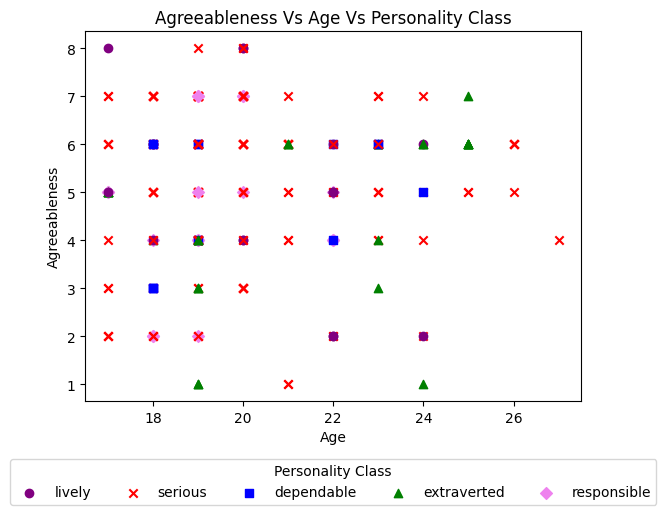

In [123]:
import matplotlib.pyplot as plt

# Create plot
fig, ax = plt.subplots()

X_train.reset_index(drop=True, inplace=True)

c = 0

# Age vs Trait X Target as symbol

# Iterate over each row in X_train
for index, row in X_train.iterrows():
    # print()
    # print('index: ', str(index))
    # print('row: ', str(row))
    # print('age: ', str(row['Age']))  # 
    # print('agreeableness: ', str(row['agreeableness']))  # 

    # Get corresponding class label for current row
    class_label = y_train.iloc[index]['Personality (Class label)']
    # print('class: ',class_label)
    
    # Get corresponding color for each column in current row
    row_colors = [colors[col] for col in X_train.columns]
    
    # Get corresponding marker for current class label
    marker = markers[class_label]
    
    # Plot current row
    # ax.scatter(row, [index]*len(row), c=row_colors, marker=marker)
    
    ax.scatter(row['Age'], row['agreeableness'], c=y_color[class_label], 
               marker=y_marker[class_label])

    c = c + 10
    if c == 5:
        break

# Create a legend for the markers and colors
for class_label, class_info in class_mapping.items():
    ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
               label=class_label)

# Set x-axis label
ax.set_xlabel('Age')

# Set y-axis label
ax.set_ylabel('Agreeableness')

# Set plot title
ax.set_title('Agreeableness Vs Age Vs Personality Class')

# Show the legend
ax.legend(title='Personality Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(class_mapping))

# Show the plot
plt.show()

In [118]:
# import matplotlib.pyplot as plt

# # Define marker and color mapping for each class label
# class_mapping = {class_label: {'marker': y_marker[class_label], 'color': y_color[class_label]} for class_label in y_color.keys()}


# # Create plot
# fig, ax = plt.subplots()

# # Iterate over each row in X_train
# for index, row in X_train.iterrows():
    
#     # Get corresponding class label for current row
#     class_label = y_train.iloc[index]['Personality (Class label)']
    
#     # Get corresponding color and marker for current class label
#     class_marker = class_mapping[class_label]['marker']
#     class_color = class_mapping[class_label]['color']
    
#     ax.scatter(row['Age'], row['agreeableness'], c=class_color, 
#                marker=class_marker,
#               alpha=0.5)

# # Create a legend for the markers and colors
# for class_label, class_info in class_mapping.items():
#     ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
#                label=class_label,
#               )

# # Set x-axis label
# ax.set_xlabel('Feature value')

# # Set y-axis label
# ax.set_ylabel('Data point')

# # Set plot title
# ax.set_title('Scatter plot of X_train')

# # Show the legend
# ax.legend()

# # Show the plot
# plt.show()

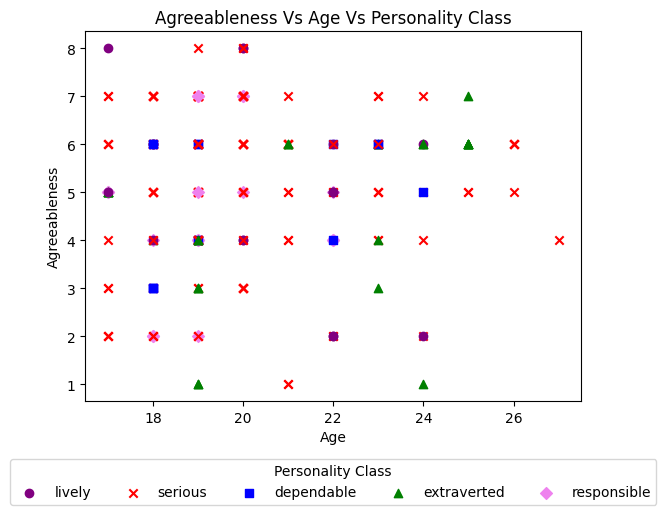

In [124]:
def plot_graph(class_, X_train, y_train):
    import matplotlib.pyplot as plt

    # Create plot
    fig, ax = plt.subplots()

    X_train.reset_index(drop=True, inplace=True)

    # c = 0

    # Age vs Trait X Target as symbol

    # Iterate over each row in X_train
    for index, row in X_train.iterrows():
        # print()
        # print('index: ', str(index))
        # print('row: ', str(row))
        # print('age: ', str(row['Age']))  # 
        # print('agreeableness: ', str(row['agreeableness']))  # 

        # Get corresponding class label for current row
        class_label = y_train.iloc[index]['Personality (Class label)']
        # print('class: ',class_label)

        # Get corresponding color for each column in current row
        row_colors = [colors[col] for col in X_train.columns]

        # Get corresponding marker for current class label
        marker = markers[class_label]

        # Plot current row
        # ax.scatter(row, [index]*len(row), c=row_colors, marker=marker)

        ax.scatter(row['Age'], row[class_], c=y_color[class_label], 
                   marker=y_marker[class_label])

        # c = c + 10
        # if c == 5:
        #     break

    # Create a legend for the markers and colors
    for class_label, class_info in class_mapping.items():
        ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
                   label=class_label)

    # Set x-axis label
    ax.set_xlabel('Age')

    # Set y-axis label
    ax.set_ylabel(class_.title())

    # Set plot title
    tmp = class_.title()
    tmp =  tmp + ' Vs Age Vs Personality Class'
    ax.set_title(tmp)

    # Show the legend
    ax.legend(title='Personality Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(class_mapping))

    # Show the plot
    plt.show()
    
plot_graph('agreeableness', X_train, y_train)

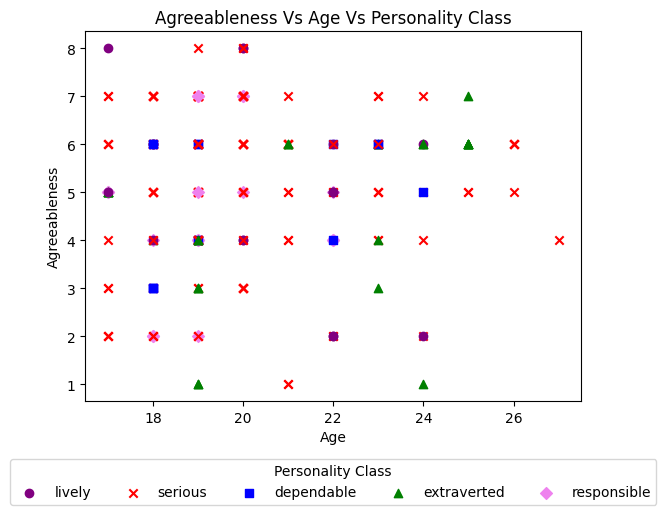

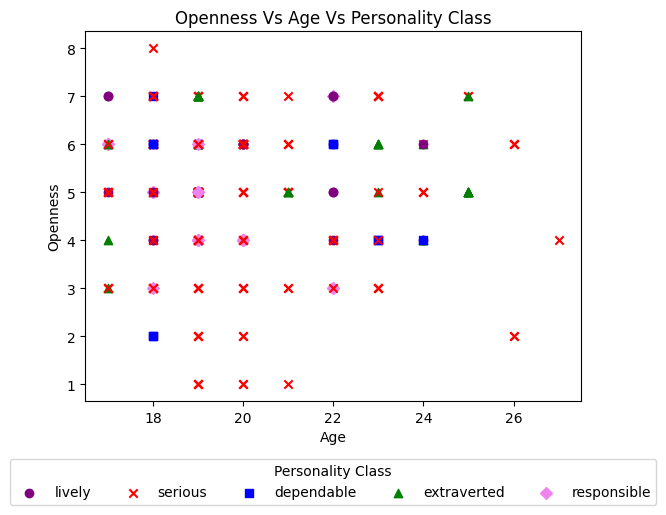

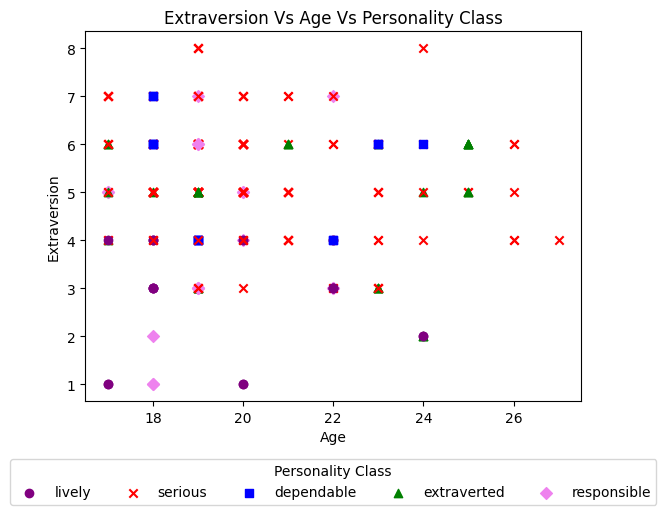

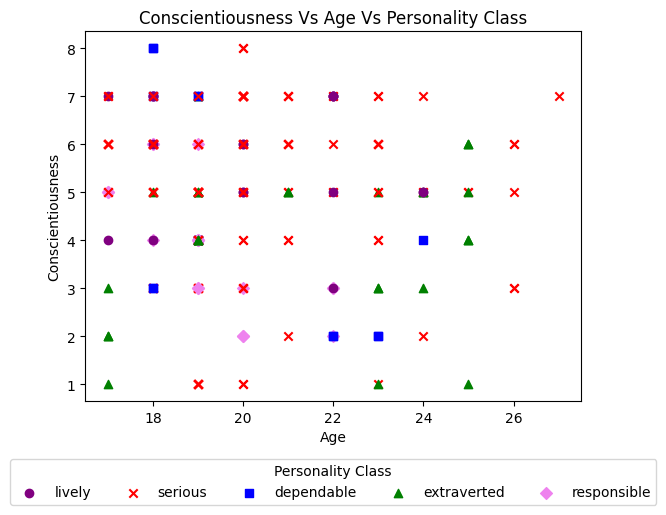

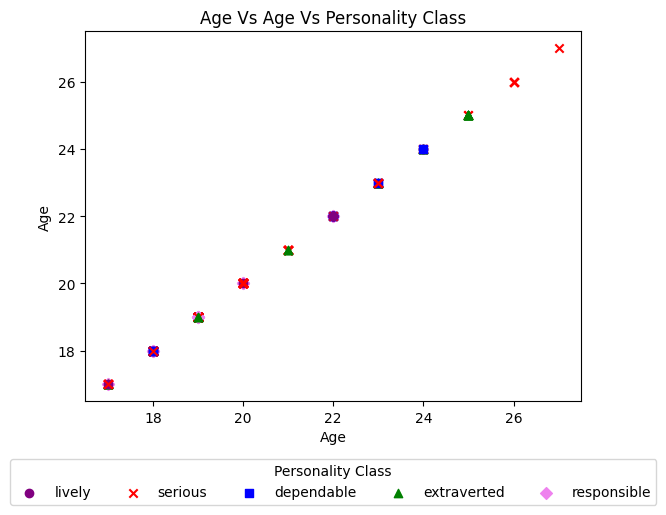

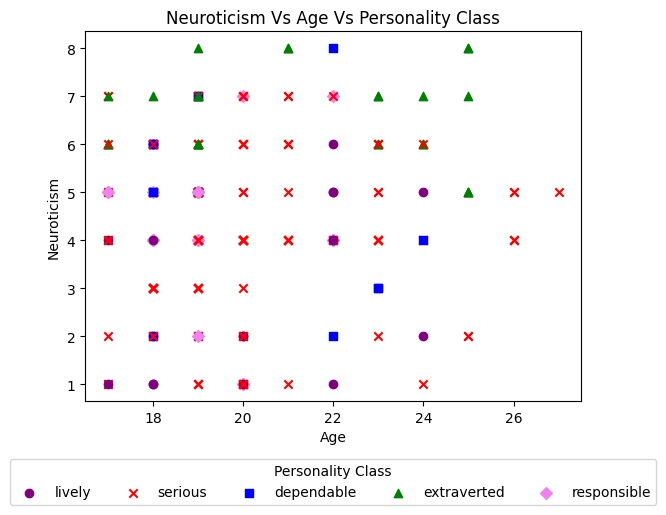

In [125]:
for i in set(X_train.columns):   # Output
    plot_graph(i, X_train, y_train)